# 10-714 Homework 2

In this homework, you will be implementing a neural network library in the needle framework. Reminder: __you must save a copy in drive__.

In [ ]:
# Code to set up the assignment
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
!mkdir -p 10714
%cd /content/drive/MyDrive/10714
!git clone https://github.com/dlsys10714/hw2.git
%cd /content/drive/MyDrive/10714/hw2

!pip3 install --upgrade --no-deps git+https://github.com/dlsys10714/mugrade.git

## Question 0

This homework builds off of Homework 1. First, in your Homework 2 directory, go to the files `autograd.py`, `ops.py` in the `python/needle` directory, and fill in the code between `### BEGIN YOUR SOLUTION` and `### END YOUR SOLUTION` with your solutions from Homework 1. 

**Note:** We have added functionality since HW1, specifically in the `autograd.py` file, so it is important to copy over your solutions rather than the entire previous file.

In [1]:
import sys
sys.path.append('./python')
sys.path.append('./apps')

## Question 1

In this first question, you will implement a few different methods for weight initialization.  This will be done in the `python/needle/init.py` file, which contains a number of routines for initializing needle Tensors using various random and constant initializations.  Following the same methodology of the existing initializers (you will want to call e.g. `init.rand` or `init.randn` from your functions below, implement the following common initialization methods.  In all cases, the functions should return `fan_in` by `fan_out` 2D tensors (extensions to other sizes can be done via e.g., reshaping).


### Xavier uniform
`xavier_uniform(fan_in, fan_out, gain=1.0, **kwargs)`

Fills the input Tensor with values according to the method described in [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), using a uniform distribution. The resulting Tensor will have values sampled from $\mathcal{U}(-a, a)$ where 

\begin{equation}
a = \text{gain} \times \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}
\end{equation}

Pass remaining `**kwargs` parameters to the corresponding `init` random call.

##### Parameters
- `fan_in` - dimensionality of input
- `fan_out` - dimensionality of output
- `gain` - optional scaling factor
___

### Xavier normal
`xavier_normal(fan_in, fan_out, gain=1.0, **kwargs)`

Fills the input Tensor with values according to the method described in [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), using a normal distribution. The resulting Tensor will have values sampled from $\mathcal{N}(0, \text{std}^2)$ where 
\begin{equation}
\text{std} = \text{gain} \times \sqrt{\frac{2}{\text{fan\_in} + \text{fan\_out}}}
\end{equation}

##### Parameters
- `fan_in` - dimensionality of input
- `fan_out` - dimensionality of output
- `gain` - optional scaling factor
___

### Kaiming uniform
`kaiming_uniform(fan_in, fan_out, nonlinearity="relu", **kwargs)`

Fills the input Tensor with values according to the method described in [Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification](https://arxiv.org/pdf/1502.01852.pdf), using a uniform distribution. The resulting Tensor will have values sampled from $\mathcal{U}(-\text{bound}, \text{bound})$ where 
\begin{equation}
\text{bound} = \text{gain} \times \sqrt{\frac{3}{\text{fan\_in}}}
\end{equation}

Use the recommended gain value for ReLU: $\text{gain}=\sqrt{2}$.

##### Parameters
- `fan_in` - dimensionality of input
- `fan_out` - dimensionality of output
- `nonlinearity` - the non-linear function
___

### Kaiming normal
`kaiming_normal(fan_in, fan_out, nonlinearity="relu", **kwargs)`

Fills the input Tensor with values according to the method described in [Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification](https://arxiv.org/pdf/1502.01852.pdf), using a uniform distribution. The resulting Tensor will have values sampled from $\mathcal{N}(0, \text{std}^2)$ where 
\begin{equation}
\text{std} = \frac{\text{gain}}{\sqrt{\text{fan\_in}}}
\end{equation}

Use the recommended gain value for ReLU: $\text{gain}=\sqrt{2}$.

##### Parameters
- `fan_in` - dimensionality of input
- `fan_out` - dimensionality of output
- `nonlinearity` - the non-linear function

In [3]:
!python3 -m pytest -v -k "test_init"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 86 deselected / 4 selected                                

tests/test_nn_and_optim.py::test_init_kaiming_uniform PASSED             [ 25%]
tests/test_nn_and_optim.py::test_init_kaiming_normal PASSED              [ 50%]
tests/test_nn_and_optim.py::test_init_xavier_uniform PASSED              [ 75%]
tests/test_nn_and_optim.py::test_init_xavier_normal PASSED               [100%]

======================= 4 passed, 86 deselected in 0.19s =======================


In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "init" -s

## Question 2

In this question, you will implement additional modules in `python/needle/nn.py`. Specifically, for the following modules described below, initialize any variables of the module in the constructor, and fill out the `forward` method. 
___

### Linear
`needle.nn.Linear(in_features, out_features, bias=True, device=None, dtype="float32")`

Applies a linear transformation to the incoming data: $y = xA^T + b$. The input shape is $(N, H_{in})$ where $H_{in}=\text{in\_features}$. The output shape is $(N, H_{out})$ where $H_{out}=\text{out\_features}$.

Be careful to explicitly broadcast the bias term to the correct shape -- Needle does not support implicit broadcasting.

Additionally note that, for all layers including this one, you should initialize the weight Tensor before the bias Tensor, and should initialize all Parameters using only functions from 'init'.

##### Parameters
- `in_features` - size of each input sample
- `out_features` - size of each output sample
- `bias` - If set to `False`, the layer will not learn an additive bias.

##### Variables
- `weight` - the learnable weights of shape (`in_features`, `out_features`). The values should be initialized with the Kaiming Uniform initialization with `fan_in = in_features`
- `bias` - the learnable bias of shape (`out_features`). The values should be initialized with the Kaiming Uniform initialize with `fan_in = out_features`. **Note the different in fan_in choice, due to their relative sizes**. 

In [1]:
!python3 -m pytest -v -k "test_nn_linear"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 82 deselected / 8 selected                                

tests/test_nn_and_optim.py::test_nn_linear_weight_init_1 PASSED          [ 12%]
tests/test_nn_and_optim.py::test_nn_linear_bias_init_1 PASSED            [ 25%]
tests/test_nn_and_optim.py::test_nn_linear_forward_1 PASSED              [ 37%]
tests/test_nn_and_optim.py::test_nn_linear_forward_2 PASSED              [ 50%]
tests/test_nn_and_optim.py::test_nn_linear_forward_3 PASSED              [ 62%]
tests/test_nn_and_optim.py::test_nn_linear_backward_1 PASSED             [ 75%]
tests/test_nn_and_optim.py::test_nn_linear_backward_2 PASSED             [ 87%]
tests/test_nn_a

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_linear"

### ReLU
`needle.nn.ReLU()`

Applies the rectified linear unit function element-wise:
$ReLU(x) = max(0, x)$.

If you have previously implemented ReLU's backwards pass in terms of itself, note that this is numerically unstable and will likely cause problems
down the line.
Instead, consider that we could write the derivative of ReLU as $I\{x>0\}$, where we arbitrarily decide that the derivative at $x=0$ is 0.
(This is a _subdifferentiable_ function.)

___

In [2]:
!python3 -m pytest -v -k "test_nn_relu"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 88 deselected / 2 selected                                

tests/test_nn_and_optim.py::test_nn_relu_forward_1 PASSED                [ 50%]
tests/test_nn_and_optim.py::test_nn_relu_backward_1 PASSED               [100%]

======================= 2 passed, 88 deselected in 0.21s =======================


In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_relu"

### Sequential
`needle.nn.Sequential(*modules)`

Applies a sequence of modules to the input (in the order that they were passed to the constructor) and returns the output of the last module.
These should be kept in a `.module` property: you should _not_ redefine any magic methods like `__getitem__`, as this may not be compatible with our tests.

##### Parameters
- `*modules` - any number of modules of type `needle.nn.Module`

___

In [3]:
!python3 -m pytest -v -k "test_nn_sequential"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 88 deselected / 2 selected                                

tests/test_nn_and_optim.py::test_nn_sequential_forward_1 PASSED          [ 50%]
tests/test_nn_and_optim.py::test_nn_sequential_backward_1 PASSED         [100%]

======================= 2 passed, 88 deselected in 0.20s =======================


In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_sequential"

### LogSumExp

`needle.ops.LogSumExp(axes)`

Here you will need to implement one additional operatior in the `python/ops.py` file, as you did in HW1. Applies a numerically stable log-sum-exp function to the input by subtracting off the maximum elements.

\begin{equation}
\text{LogSumExp}(z) = \log (\sum_{i} \exp (z_i - \max{z})) + \max{z}
\end{equation}

#### Parameters
- `axes` - Tuple of axes to sum and take the maximum element over. This uses the same conventions as `needle.ops.Summation()`

___

In [4]:
!python3 -m pytest -v -k "test_op_logsumexp"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 80 deselected / 10 selected                               

tests/test_nn_and_optim.py::test_op_logsumexp_forward_1 PASSED           [ 10%]
tests/test_nn_and_optim.py::test_op_logsumexp_forward_2 PASSED           [ 20%]
tests/test_nn_and_optim.py::test_op_logsumexp_forward_3 PASSED           [ 30%]
tests/test_nn_and_optim.py::test_op_logsumexp_forward_4 PASSED           [ 40%]
tests/test_nn_and_optim.py::test_op_logsumexp_forward_5 PASSED           [ 50%]
tests/test_nn_and_optim.py::test_op_logsumexp_backward_1 PASSED          [ 60%]
tests/test_nn_and_optim.py::test_op_logsumexp_backward_2 PASSED          [ 70%]
tests/test_nn_a

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "op_logsumexp"

### SoftmaxLoss

`needle.nn.SoftmaxLoss()`

Applies the softmax loss as defined below (and as implemented in Homework 1), taking in as input a Tensor of logits and a Tensor of the true labels (expressed as a list of numbers, *not* one-hot encoded).

Note that you can use the `init.one_hot` function now instead of writing this yourself.  Note: You will need to use the numerically stable logsumexp operated you just implemented for this purpose.

\begin{equation}
\ell_\text{softmax}(z,y) = \log \sum_{i=1}^k \exp z_i - z_y
\end{equation}

___

In [5]:
!python3 -m pytest -v -k "test_nn_softmax_loss"

============================= test session starts ==============================
platform darwin -- Python 3.10.8, pytest-7.2.1, pluggy-1.0.0 -- /Users/steveyang/miniconda3/bin/python3
cachedir: .pytest_cache
rootdir: /Users/steveyang/Library/CloudStorage/GoogleDrive-yangchenyun@gmail.com/My Drive/10714/hw2
plugins: dotenv-0.5.2, anyio-3.6.2
collected 90 items / 86 deselected / 4 selected                                

tests/test_nn_and_optim.py::test_nn_softmax_loss_forward_1 PASSED        [ 25%]
tests/test_nn_and_optim.py::test_nn_softmax_loss_forward_2 PASSED        [ 50%]
tests/test_nn_and_optim.py::test_nn_softmax_loss_backward_1 PASSED       [ 75%]
tests/test_nn_and_optim.py::test_nn_softmax_loss_backward_2 PASSED       [100%]

======================= 4 passed, 86 deselected in 0.21s =======================


In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_softmax_loss"

### LayerNorm1d
`needle.nn.LayerNorm1d(dim, eps=1e-5, device=None, dtype="float32")`

Applies layer normalization over a mini-batch of inputs as described in the paper [Layer Normalization](https://arxiv.org/abs/1607.06450).

\begin{equation}
y = w \circ \frac{x_i - \textbf{E}[x]}{((\textbf{Var}[x]+\epsilon)^{1/2})} + b
\end{equation}

where $\textbf{E}[x]$ denotes the empirical mean of the inputs, $\textbf{Var}[x]$ denotes their empirical variance (not that here we are using the "unbiased" estimate of the variance, i.e., dividing by $N$ rather than by $N-1$), and $w$ and $b$ denote learnable scalar weights and biases respectively.  Note you can assume the input to this layer by be a 2D tensor, with batches in the first dimension and features on the second.

##### Parameters
- `dim` - number of channels
- `eps` - a value added to the denominator for numerical stability.

##### Variables
- `weight` - the learnable weights of size `dim`, elements initialized to 1.
- `bias` - the learnable bias of shape `dim`, elements initialized to 0 **(changed from 1)**.
___

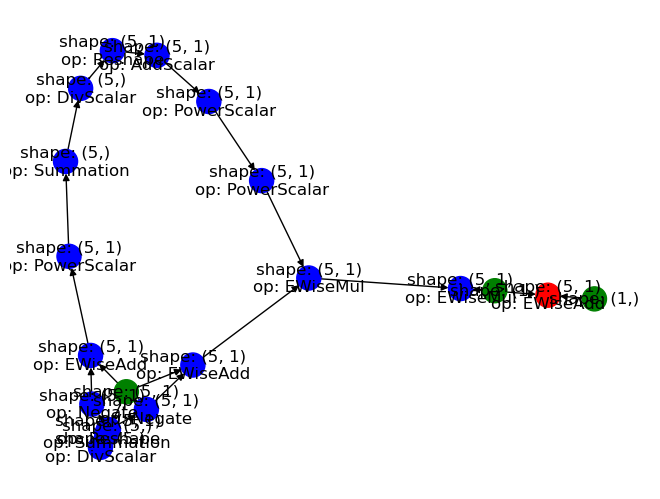

In [14]:
import needle as ndl
import numpy as np

def get_tensor(*shape, entropy=1):
    np.random.seed(np.prod(shape) * len(shape) * entropy)
    return ndl.Tensor(np.random.randint(0, 100, size=shape) / 20, dtype="float32")

dims = 1
f = ndl.nn.LayerNorm1d(dims)
x = get_tensor(5, 1)
g = f(x)


import importlib
import viz
importlib.reload(viz)
viz.viz(g)

In [ ]:
!python3 -m pytest -v -k "test_nn_layernorm"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_layernorm"


### Flatten
`needle.nn.Flatten()`

Takes in a tensor of shape `(B,X_0,X_1,...)`, and flattens all non-batch dimensions so that the output is of shape `(B, X_0 * X_1 * ...)`

In [ ]:
!python3 -m pytest -v -k "test_nn_flatten"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_flatten"

### BatchNorm1d
`needle.nn.BatchNorm1d(dim, eps=1e-5, momentum=0.1, device=None, dtype="float32")`

Applies batch normalization over a mini-batch of inputs as described in the paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167).

\begin{equation}
y = w \circ \frac{z_i - \textbf{E}[x]}{((\textbf{Var}[x]+\epsilon)^{1/2})} + b
\end{equation}

but where here the mean and variance refer to to the mean and variance over the _batch_dimensions.  The function also computes a running average of mean/variance for all features at each layer $\hat{\mu}, \hat{\sigma}^2$, and at test time normalizes by these quantities:

\begin{equation}
y = \frac{(x - \hat{mu})}{((\hat{\sigma}^2_{i+1})_j+\epsilon)^{1/2}}
\end{equation}


BatchNorm uses the running estimates of mean and variance instead of batch statistics at test time, i.e.,
after `model.eval()` has been called on the BatchNorm layer's `training` flag is false.

To compute the running estimates, you can use the equation $$\hat{x_{new}} = (1 - m) \hat{x_{old}} + mx_{observed},$$
where $m$ is momentum.

##### Parameters
- `dim` - input dimension
- `eps` - a value added to the denominator for numerical stability.
- `momentum` - the value used for the running mean and running variance computation.

##### Variables
- `weight` - the learnable weights of size `dim`, elements initialized to 1.
- `bias` - the learnable bias of size `dim`, elements initialized to 0.
- `running_mean` - the running mean used at evaluation time, elements initialized to 0.
- `running_var` - the running (unbiased) variance used at evaluation time, elements initialized to 1. 

___

In [ ]:
!python3 -m pytest -v -k "test_nn_batchnorm"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_batchnorm"

### Dropout
`needle.nn.Dropout(p = 0.5)`

During training, randomly zeroes some of the elements of the input tensor with probability `p` using samples from a Bernoulli distribution. This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons as described in the paper [Improving neural networks by preventing co-adaption of feature detectors](https://arxiv.org/abs/1207.0580). During evaluation the module simply computes an identity function. 

\begin{equation}
\hat{z}_{i+1} = \sigma_i (W_i^T z_i + b_i) \\
(z_{i+1})_j = 
    \begin{cases}
    (\hat{z}_{i+1})_j /(1-p) & \text{with probability } 1-p \\
    0 & \text{with probability } p \\
    \end{cases}
\end{equation}

**Important**: If the Dropout module the flag `training=False`, you shouldn't "dropout" any weights. That is, dropout applies during training only, not during evaluation. Note that `training` is a flag in `nn.Module`.

##### Parameters
- `p` - the probability of an element to be zeroed.

___

In [ ]:
!python3 -m pytest -v -k "test_nn_dropout"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_dropout"

### Residual
`needle.nn.Residual(fn: Module)`

Applies a residual or skip connection given module $\mathcal{F}$ and input Tensor $x$, returning $\mathcal{F}(x) + x$.
##### Parameters
- `fn` - module of type `needle.nn.Module`

In [ ]:
!python3 -m pytest -v -k "test_nn_residual"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "nn_residual"

## Question 3

Implement the `step` function of the following optimizers.
Make sure that your optimizers _don't_ modify the gradients of tensors in-place.

We have included some tests to ensure that you are not consuming excessive memory, which can happen if you are
not using `.data` or `.detach()` in the right places, thus building an increasingly large computational graph
(not just in the optimizers, but in the previous modules as well).
You can ignore these tests, which include the string `memory_check` at your own discretion.

___

### SGD
`needle.optim.SGD(params, lr=0.01, momentum=0.0, weight_decay=0.0)`

Implements stochastic gradient descent (optionally with momentum, shown as $\beta$ below). 

\begin{equation}
\begin{split}
    u_{t+1} &= \beta u_t + (1-\beta) \nabla_\theta f(\theta_t) \\
    \theta_{t+1} &= \theta_t - \alpha u_{t+1}
\end{split}
\end{equation}

##### Parameters
- `params` - iterable of parameters of type `needle.nn.Parameter` to optimize
- `lr` (*float*) - learning rate
- `momentum` (*float*) - momentum factor
- `weight_decay` (*float*) - weight decay (L2 penalty)
___

In [ ]:
!python3 -m pytest -v -k "test_optim_sgd"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "optim_sgd"

### Adam
`needle.optim.Adam(params, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8, weight_decay=0.0)`

Implements Adam algorithm, proposed in [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980). 

\begin{equation}
\begin{split}
u_{t+1} &= \beta_1 u_t + (1-\beta_1) \nabla_\theta f(\theta_t) \\
v_{t+1} &= \beta_2 v_t + (1-\beta_2) (\nabla_\theta f(\theta_t))^2 \\
\hat{u}_{t+1} &= u_{t+1} / (1 - \beta_1^t) \quad \text{(bias correction)} \\
\hat{v}_{t+1} &= v_{t+1} / (1 - \beta_2^t) \quad \text{(bias correction)}\\
\theta_{t+1} &= \theta_t - \alpha \hat{u_{t+1}}/(\hat{v}_{t+1}^{1/2}+\epsilon)
\end{split}
    \end{equation}

**Important:** Pay attention to whether or not you are applying bias correction.

##### Parameters
- `params` - iterable of parameters of type `needle.nn.Parameter` to optimize
- `lr` (*float*) - learning rate
- `beta1` (*float*) - coefficient used for computing running average of gradient
- `beta2` (*float*) - coefficient used for computing running average of square of gradient
- `eps` (*float*) - term added to the denominator to improve numerical stability
- `bias_correction` - whether to use bias correction for $u, v$
- `weight_decay` (*float*) - weight decay (L2 penalty)

In [ ]:
!python3 -m pytest -v -k "test_optim_adam"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "optim_adam"

## Question 4

In this question, you will implement two data primitives: `needle.data.DataLoader` and `needle.data.Dataset`. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples. 

For this question, you will be working in `python/needle/data.py`. First, copy your solution to `parse_mnist` from the previous homework into the `parse_mnist` function. 

### Transformations

First we will implement a few transformations that are helpful when working with images. We will stick with a horizontal flip and a random crop for now. Fill out the following functions in `data.py`.
___ 

#### RandomFlipHorizontal
`needle.data.RandomFlipHorizontal(p = 0.5)`

Flips the image horizontally, with probability `p`.

##### Parameters
- `p` (*float*) - The probability of flipping the input image.
___

#### RandomCrop
`needle.data.RandomCrop(padding=3)`

Padding is added to all side of the image, and then the image is cropped back to it's original size at a random location. Returns an image the same size as the original image.

##### Parameters
- `padding` (*int*) - The padding on each border of the image.

In [ ]:
!python3 -m pytest -v -k "flip_horizontal"
!python3 -m pytest -v -k "random_crop"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "flip_horizontal"
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "random_crop"

### Dataset

Each `Dataset` subclass must implement three functions: `__init__`, `__len__`, and `__getitem__`. The `__init__` function initializes the images, labels, and transforms. The `__len__` function returns the number of samples in the dataset. The `__getitem__` function retrieves a sample from the dataset at a given index `idx`, calls the transform functions on the image (if applicable), converts the image and label to a numpy array (the data will be converted to Tensors elsewhere). Fill out these functions in the `MNISTDataset` class: 
___ 

### MNISTDataset
`needle.data.MNISTDataset(image_filesname, label_filesname, transforms)`

##### Parameters
- `image_filesname` - path of file containing images
- `label_filesname` - path of file containing labels
- `transforms` - an optional list of transforms to apply to data


In [ ]:
!python3 -m pytest -v -k "test_mnist_dataset"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "mnist_dataset"

### Dataloader

The Dataloader class provides an interface for assembling mini-batches of examples suitable for training using SGD-based approaches, backed by a Dataset object.  In order to build the typical Dataloader interface (allowing users to iterate over all the mini-batches in the dataset), you will need the implement the `__iter__()` and `__next__()` calls in the class: `__iter__()` is called at the start of iteration, while `__next__()` is called to grab the next mini-batch. Please note that subsequent calls to next will require you to return the following batches, so next is not a pure function.
___

### Dataloader
`needle.data.Dataloader(dataset: Dataset, batch_size: Optional[int] = 1, shuffle: bool = False)`

Combines a dataset and a sampler, and provides an iterable over the given dataset. 

##### Parameters
- `dataset` - `needle.data.Dataset` - a dataset 
- `batch_size` - `int` - what batch size to serve the data in 
- `shuffle` - `bool` - set to ``True`` to have the data reshuffle at every epoch, default ``False``.
___ 





In [ ]:
!python3 -m pytest -v -k "test_dataloader"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "dataloader"

## Question 5

Given you have now implemented all the necessary components for our neural network library, let's build and train an MLP ResNet. For this question, you will be working in `apps/mlp_resnet.py`. First, fill out the functions `ResidualBlock` and `MLPResNet` as described below:

### ResidualBlock
`ResidualBlock(dim, hidden_dim, norm=nn.BatchNorm1d, drop_prob=0.1)`

Implements a residual block as follows:

![](figures/residualblock.png)

where the first linear layer has `in_features=dim` and `out_features=hidden_dim`, and the last linear layer has `out_features=dim`. Returns the block as type `nn.Module`. 

##### Parameters
- `dim` (*int*) - input dim
- `hidden_dim` (*int*) - hidden dim
- `norm` (*nn.Module*) - normalization method
- `drop_prob` (*float*) - dropout probability

___

### MLPResNet
`MLPResNet(dim, hidden_dim=100, num_blocks=3, num_classes=10, norm=nn.BatchNorm1d, drop_prob=0.1)`

Implements an MLP ResNet as follows:

![](figures/mlp_resnet.png)

where the first linear layer has `in_features=dim` and `out_features=hidden_dim`, and each ResidualBlock has `dim=hidden_dim` and `hidden_dim=hidden_dim//2`. Returns a network of type `nn.Module`.

##### Parameters
- `dim` (*int*) - input dim
- `hidden_dim` (*int*) - hidden dim
- `num_blocks` (*int*) - number of ResidualBlocks
- `num_classes` (*int*) - number of classes
- `norm` (*nn.Module*) - normalization method
- `drop_prob` (*float*) - dropout probability (0.1)
___ 

Once you have the deep learning model architecture correct, let's train the network using our new neural network library components. Specifically, implement the functions `epoch` and `train_mnist`.

### Epoch

`epoch(dataloader, model, opt=None)`

Executes one epoch of training or evaluation, iterating over the entire training dataset once (just like `nn_epoch` from previous homeworks). Returns the average error rate **(changed from accuracy)** (as a *float*) and the average loss over all samples (as a *float*). Set the model to `training` mode at the beginning of the function if `opt` is given; set the model to `eval` if `opt` is not given (i.e. `None`).

##### Parameters
- `dataloader` (*`needle.data.DataLoader`*) - dataloader returning samples from the training dataset
- `model` (*`needle.nn.Module`*) - neural network
- `opt` (*`needle.optim.Optimizer`*) - optimizer instance, or `None`

___

### Train Mnist

`train_mnist(batch_size=100, epochs=10, optimizer=ndl.optim.Adam, lr=0.001, weight_decay=0.001, hidden_dim=100, data_dir="data")`
                
Initializes a training dataloader (with `shuffle` set to `True`) and a test dataloader for MNIST data, and trains an `MLPResNet` using the given optimizer (if `opt` is not None) and the softmax loss for a given number of epochs. Returns a tuple of the training accuracy, training loss, test accuracy, test loss computed in the last epoch of training. If any parameters are not specified, use the default parameters.

##### Parameters
- `batch_size` (*int*) - batch size to use for train and test dataloader
- `epochs` (*int*) - number of epochs to train for
- `optimizer` (*`needle.optim.Optimizer` type*) - optimizer type to use
- `lr` (*float*) - learning rate 
- `weight_decay` (*float*) - weight decay
- `hidden_dim` (*int*) - hidden dim for `MLPResNet`
- `data_dir` (*int*) - directory containing MNIST image/label files


In [ ]:
!python3 -m pytest -v -k "test_mlp"

In [ ]:
!python -m mugrade submit 'YOUR_GRADER_KEY_HERE' -k "mlp_resnet"

We encourage to experiment with the `mlp_resnet.py` training script.
You can investigate the effect of using different initializers on the Linear layers,
increasing the dropout probability,
or adding transforms (via a list to the `transforms=` keyword argument of Dataset)
such as random cropping.